In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy as cp
import random
import json 
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [12]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [38]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [39]:
samplecity.reset_index()

,index,city,country
0,1982,nola,cf
1,6703,ust-kamchatsk,ru
2,7147,karaidel,ru
3,1089,samalaeulu,ws
4,5356,la baneza,es
5,6134,novomykolayivka,ua
6,4927,annau,tm
7,253,butterworth,za
8,7060,chik,ru
9,7347,maksatikha,ru


In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    #print(query_url)
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        #print(query_url)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
        
        print(f"This is city#: {count}")
        print(f"This is: {row['city']}" )
        print(f"This is the requested URL: {query_url}")
    except KeyError:
        print(f"No data for this city: {row['city']}")
#     print(f"This is city#: {count}")
#     print(f"This is: {row['city']}" )
#     print(f"This is the requested URL: {query_url}")
    

C:\Users\jarraj01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jarraj01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jarraj01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jarraj01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jarraj01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_v

This is city#: 1
This is: nola
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=nola
No data for this city: ust-kamchatsk
This is city#: 3
This is: karaidel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=karaidel
No data for this city: samalaeulu
This is city#: 5
This is: la baneza
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=la baneza
This is city#: 6
This is: novomykolayivka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=novomykolayivka
This is city#: 7
This is: annau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=annau
This is city#: 8
This is: butterworth
This is the request

This is city#: 52
This is: borovskoy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=borovskoy
This is city#: 53
This is: morondava
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=morondava
This is city#: 54
This is: madras
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=madras
This is city#: 55
This is: tulum
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=tulum
This is city#: 56
This is: coihueco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=coihueco
This is city#: 57
This is: cabra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443

This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=mokhotlong
This is city#: 104
This is: vernon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=vernon
This is city#: 105
This is: kjollefjord
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=kjollefjord
This is city#: 106
This is: karatuzskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=karatuzskoye
This is city#: 107
This is: ales
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=ales
This is city#: 108
This is: selenduma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&un

This is city#: 152
This is: santa luzia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=santa luzia
This is city#: 153
This is: tautira
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=tautira
This is city#: 154
This is: novaya igirma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=novaya igirma
This is city#: 155
This is: fuxin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=fuxin
This is city#: 156
This is: taitung
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=taitung
No data for this city: xghajra
This is city#: 158
This is: amurzet
This is the requested URL: http://api.openweath

This is city#: 203
This is: pedra azul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=pedra azul
This is city#: 204
This is: little current
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=little current
This is city#: 205
This is: nevsehir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=nevsehir
This is city#: 206
This is: puerto madero
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=puerto madero
This is city#: 207
This is: winkler
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=winkler
No data for this city: matto
This is city#: 209
This is: tahlequah
This is the requested URL: ht

This is city#: 256
This is: miracema do tocantins
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=miracema do tocantins
This is city#: 257
This is: mpanda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=mpanda
No data for this city: mirina
This is city#: 259
This is: new norfolk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=new norfolk
This is city#: 260
This is: stafford
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=stafford
This is city#: 261
This is: siedlce
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=siedlce
This is city#: 262
This is: kabanjahe
This is the requested URL:

This is city#: 306
This is: mazsalaca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=mazsalaca
This is city#: 307
This is: ati
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=ati
This is city#: 308
This is: bata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=bata
This is city#: 309
This is: tres passos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=tres passos
This is city#: 310
This is: perth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=perth
This is city#: 311
This is: vardo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee

This is city#: 357
This is: maple creek
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=maple creek
This is city#: 358
This is: urdoma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=urdoma
This is city#: 359
This is: nchelenge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=nchelenge
This is city#: 360
This is: chubbuck
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=chubbuck
No data for this city: safaga
This is city#: 362
This is: ballater
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=ballater
This is city#: 363
This is: mpulungu
This is the requested URL: http://api.openweather

This is city#: 410
This is: aracati
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=aracati
This is city#: 411
This is: wuwei
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=wuwei
This is city#: 412
This is: kasempa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=kasempa
This is city#: 413
This is: ocean city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=ocean city
This is city#: 414
This is: valleyview
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=valleyview
This is city#: 415
This is: tsiroanomandidy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appi

This is city#: 463
This is: khuchni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=khuchni
This is city#: 464
This is: tyup
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=tyup
This is city#: 465
This is: zagreb
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=zagreb
This is city#: 466
This is: kazerun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=kazerun
This is city#: 467
This is: dunoon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a156cf117d1a332443a8ee7db020895c&units=Imperial&q=dunoon
No data for this city: linchuan
This is city#: 469
This is: bicester
This is the requested URL: http://api.openweathermap.org/data/2.5/weath

In [46]:
#samplecity = samplecity[samplecity.latitude != ""]
#samplecity

samplecity = samplecity[samplecity.latitude != ""]
samplecity.head()


,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
1982,nola,cf,3,3,68,99,92,2
7147,karaidel,ru,55,55,21,82,0,7
5356,la baneza,es,42,42,37,93,88,8
6134,novomykolayivka,ua,48,48,53,99,92,3
4927,annau,tm,37,37,48,76,75,2


In [45]:
samplecity.dtypes

city           object
country        object
latitude       object
longitude      object
temperature    object
humidity       object
cloudiness     object
wind_speed     object
dtype: object

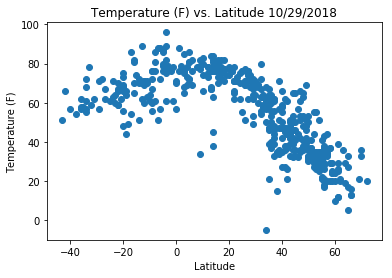

In [47]:
# import datetime
# date = datetime.date.today()
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

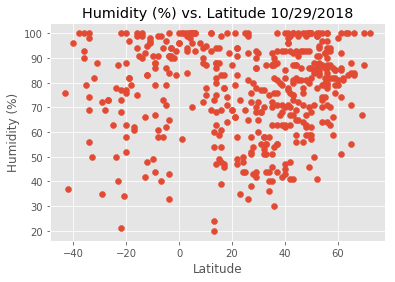

In [48]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

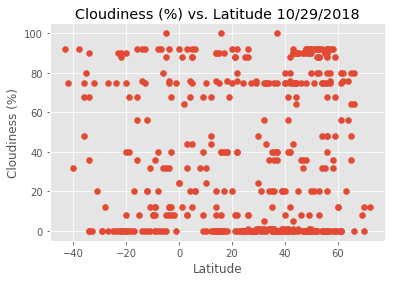

In [49]:

# plt.scatter(latitude,cloudy)# plt.sc 
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

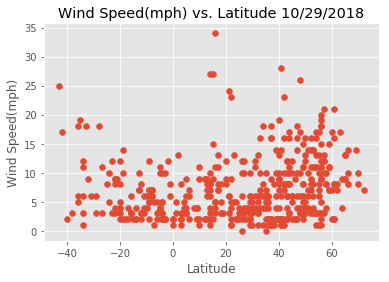

In [50]:

# plt.scatter(latitude,windspeed)# plt.sc 
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [51]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,nola,cf,3,3,68,99,92,2
1,karaidel,ru,55,55,21,82,0,7
2,la baneza,es,42,42,37,93,88,8
3,novomykolayivka,ua,48,48,53,99,92,3
4,annau,tm,37,37,48,76,75,2
